# Data Science I Topic 3.1 Descriptive Statistics

## Non-programming Exercise

<u>In this non-programming/ "pen and paper" exercise, feel free to answer the questions/ perform the calculations on a piece of paper, use your calculator, or use the code cells like you'd use your calculator during the exam (i.e. standard arithmetic calculations up to whatever your scientific calculators can do). </u>

**Q1:** <u>Briefly (1-2 sentences), explain the differences of:</u>

1. Population vs. Sample

2. Parameter vs. Statistic

3. Variable vs. Constant

4. Qualitative vs. Quantitative Variables

1. Population represents the entire set of elements that are the focus of a statistical study, whereas a sample is the analysed subset of it
2. Parameter is value which describes a characteristic of the distribution of the population. Statistic is a value calculated over a sample 

**Q2:** Given the following data of the lifetime (in hours) of 12 transistors:<br>
113, 121, 140, 106, 132, 134, 118, 117, 108, 122, 127, 138

1. Find the sample mean, median, variance, and standard deviation.
2. Assuming the lifetime of transistors follows a normal distribution, calculate the standard scores of the data points: 106, 117, 132, and 140.
3. We want to transform this dataset such that the mean is now 100 with standard deviation of 10. Find the new transformed dataset.

In [1]:
import pandas as pd
from scipy import stats

lifetimes = [113, 121, 140, 106, 132, 134, 118, 117, 108, 122, 127, 138]

lifetimes_s = pd.Series(lifetimes)

mean = lifetimes_s.mean()
median = lifetimes_s.median()
mode = lifetimes_s.mode()[0]

print("Mean = {}, Mode = {}, Median = {}".format(mean, mode, median))

Mean = 123.0, Mode = 106, Median = 121.5


**Q3**: <u>Describe the relationship of mean and median in:</u>
* Normal distribution
* Positively skewed distribution
* Negatively skewed distribution

**Answer**

- Normal distribution: equal, it is a symmetric distribution over the mean
- Positively skewed: the mean is greater than the median and the mode. The right tail of the distribution is longer, thicker (more outliers stay at the right of the distribution)
- Negatively skewed: the mean is smaller than the median and the mode. The left tail of the distribution is longer, thicker (more outliers stay at the left of the distribution)

**Q4**: Calculate the Pearson correlation coefficients between the numbers of **Gold** and **Total** medals achieved in the 2016 Olympic by the 12 countries shown below.

<img src="./content/medal.png" width="500">
(source:Wiki)

In [2]:
# when editing with colab, the "<img src..." doesn't work, so you can do this instead:
# from IPython.display import Image
# Image("./content/medal.png")


medals_df = pd.DataFrame({"Gold" : [46, 27, 26, 19, 17, 12, 10, 9, 8, 8, 8, 8], "Total" : [121, 67, 70, 56, 42, 41, 42, 21, 28, 29, 19, 15]})

medals_df.corr()

,Gold,Total
Gold,1.000000,0.976296
Total,0.976296,1.000000


## Programming Exercise

<u>Descriptive statistics is concerned with the description and summarization of data. We need to present data in a meaningful way. We've seen before in T2 how to extract summary statistics and visual information from a data frame. In this tutorial we'll practise what we know from EDA and see more data description techniques.</u>

In [3]:
!pip install pydataset

In [4]:
# Run this cell
from pydataset import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

For this tutorial, we are going to use the `birthwt` data set from `pydataset`. Follow the instructions below.

In [5]:
# Run this cell to show the dataset documentation
birthwt = data('birthwt', show_doc=True)

birthwt

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Risk Factors Associated with Low Infant Birth Weight

### Description

The `birthwt` data frame has 189 rows and 10 columns. The data were collected
at Baystate Medical Center, Springfield, Mass during 1986.

### Usage

    birthwt

### Format

This data frame contains the following columns:

`low`

indicator of birth weight less than 2.5 kg.

`age`

mother's age in years.

`lwt`

mother's weight in pounds at last menstrual period.

`race`

mother's race (`1` = white, `2` = black, `3` = other).

`smoke`

smoking status during pregnancy.

`ptl`

number of previous premature labours.

`ht`

history of hypertension.

`ui`

presence of uterine irritability.

`ftv`

number of physician visits during the first trimester.

`bwt`

birth weight in grams.

### Source

Hosmer, D.W. and Lemeshow, S. (1989) _Applied Logistic Regression._ New York:
Wiley

### References

Venables, W. N. and Ripley, 

In [6]:
# Run this cell to display the first 5 entries of birthwt
birthwt = data('birthwt')
print(birthwt.head())

    low  age  lwt  race  smoke  ptl  ht  ui  ftv   bwt
85    0   19  182     2      0    0   0   1    0  2523
86    0   33  155     3      0    0   0   0    3  2551
87    0   20  105     1      1    0   0   0    1  2557
88    0   21  108     1      1    0   0   1    2  2594
89    0   18  107     1      1    0   0   1    0  2600


In [ ]:
# Optional: To see all available data from pydataset, run this cell.
pd.set_option("display.max_rows", None, "display.max_columns", None)
data()


In [8]:
# If you run the cell directly above, also run this cell to reset the option
pd.reset_option('all', silent=True) # because of the set_option above

***

### Describing data set

#### Reading a stem and leaf graph

<u>Run the following cell and answer the questions.</u>

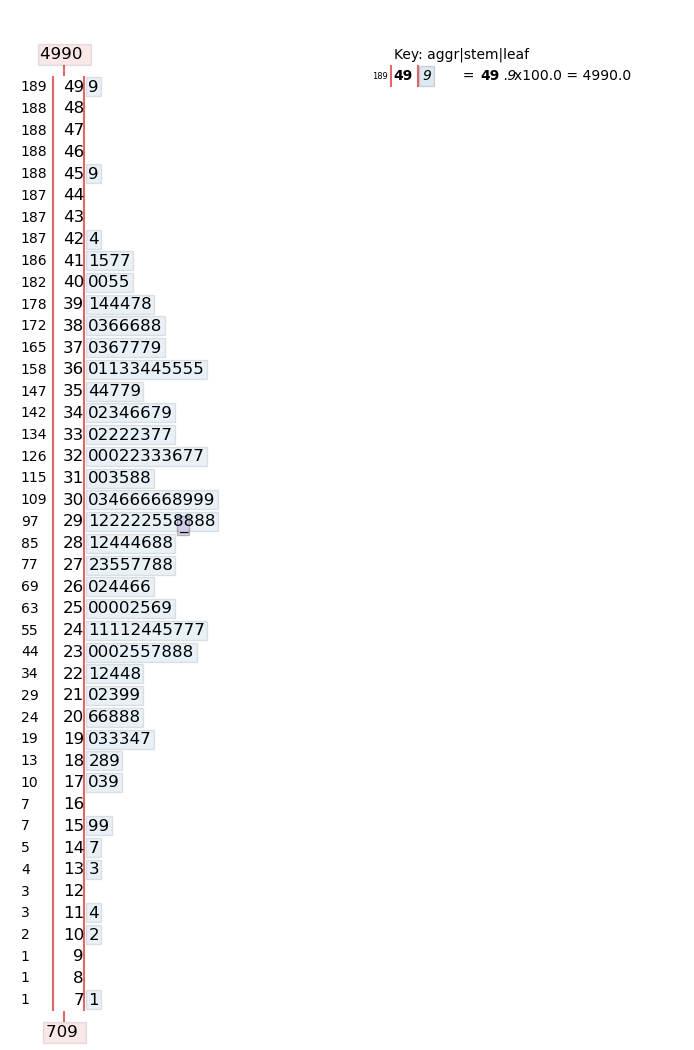

In [9]:
import stemgraphic # may need to install first: pip install stemgraphic
fig, ax = stemgraphic.stem_graphic(birthwt.bwt)
plt.show()

<u>Note that the leaves are rounded off to the nearest tens (see the Key). Compare to the following list.</u>

In [10]:
# Run this cell to see the sorted values of all birth weights.
print(birthwt.bwt.sort_values().to_list())

[709, 1021, 1135, 1330, 1474, 1588, 1588, 1701, 1729, 1790, 1818, 1885, 1893, 1899, 1928, 1928, 1928, 1936, 1970, 2055, 2055, 2082, 2084, 2084, 2100, 2125, 2126, 2187, 2187, 2211, 2225, 2240, 2240, 2282, 2296, 2296, 2301, 2325, 2353, 2353, 2367, 2381, 2381, 2381, 2410, 2410, 2410, 2414, 2424, 2438, 2442, 2450, 2466, 2466, 2466, 2495, 2495, 2495, 2495, 2523, 2551, 2557, 2594, 2600, 2622, 2637, 2637, 2663, 2665, 2722, 2733, 2750, 2751, 2769, 2769, 2778, 2782, 2807, 2821, 2835, 2835, 2836, 2863, 2877, 2877, 2906, 2920, 2920, 2920, 2920, 2922, 2948, 2948, 2977, 2977, 2977, 2977, 3005, 3033, 3042, 3062, 3062, 3062, 3062, 3062, 3080, 3090, 3090, 3090, 3100, 3104, 3132, 3147, 3175, 3175, 3203, 3203, 3203, 3225, 3225, 3232, 3232, 3234, 3260, 3274, 3274, 3303, 3317, 3317, 3317, 3321, 3331, 3374, 3374, 3402, 3416, 3430, 3444, 3459, 3460, 3473, 3487, 3544, 3544, 3572, 3572, 3586, 3600, 3614, 3614, 3629, 3629, 3637, 3643, 3651, 3651, 3651, 3651, 3699, 3728, 3756, 3770, 3770, 3770, 3790, 3799, 3827

<u>From the graph and rounded off to nearest tens of grams,</u>
1. What's the median weight?
2. How many babies were born with 3.2 kg birth weight?
3. How many babies were born with more than 4 kg? less than 1.5 kg?

**Ans:**






1. approx 2980
2. 3
3. 9 and 5

In [12]:
print(birthwt.bwt.median())
print(birthwt[(birthwt["bwt"] < 3205) & (birthwt["bwt"] >= 3200)])
print(len(birthwt[(birthwt["bwt"] > 4000)]))
print(birthwt[(birthwt["bwt"] < 1500)])

2977.0
     low  age  lwt  race  smoke  ptl  ht  ui  ftv   bwt
144    0   21  110     3      1    0   0   1    0  3203
145    0   30  153     3      0    0   0   0    0  3203
146    0   20  103     3      0    0   0   0    0  3203
9
    low  age  lwt  race  smoke  ptl  ht  ui  ftv   bwt
4     1   28  120     3      1    1   0   1    0   709
10    1   29  130     1      0    0   0   1    2  1021
11    1   34  187     2      1    0   1   0    0  1135
13    1   25  105     3      0    1   1   0    0  1330
15    1   25   85     3      0    0   0   1    0  1474


***

#### Frequency tables using `pandas.crosstab()`

<u>Run the following cell and answer the questions.</u>

In [14]:
# Recall low=1 when birth weight is <2.5kg (see the dataset description)
pd.crosstab(index=birthwt.age, # set index based on birthwt.age
            columns=[birthwt.low], # values to group by in the columns
            margins=True) # Add marginal value (row sums)

low,0,1,All
age,,,
14,1,2,3
15,1,2,3
16,6,1,7
17,7,5,12
18,8,2,10
19,13,3,16
20,10,8,18
21,7,5,12
22,11,2,13


1. What is the ratio of babies born with low birth weight?
2. Among women younger than 18, what is the ratio of babies born with low birth weight?

**Ans:**

1. $59/189$
2. $(2+2+1+5)/(3+3+7+12) = 10/25$

<u>We can also set multiple column levels to group the values.</u>

In [15]:
# Try it: complete the following to get multiple column levels
cross_df = pd.crosstab(index=birthwt.race, #set index based on the race
            columns=[birthwt.smoke, birthwt.low], # tabulate based on two column levels
            margins=True) # display row sums

print(cross_df)

smoke   0       1      All
low     0   1   0   1     
race                      
1      40   4  33  19   96
2      11   5   4   6   26
3      35  20   7   5   67
All    86  29  44  30  189


* Among smokers, what's the ratio of babies with low birth weight?
* Among non-smokers, what's the ratio of babies with low birth weight?

**Ans:**

In [16]:
total_smoker_low_birth_w = cross_df.loc["All", (1,1)]
total_smoker_non_low_birth_w = cross_df.loc["All", (1,0)]

total_non_smoker_low_birth_w = cross_df.loc["All", (0,1)]
total_non_smoker_non_low_birth_w = cross_df.loc["All", (0,0)]

print("Among smokers, ratio of babies with low birth weight is: ", total_smoker_low_birth_w / (total_smoker_non_low_birth_w + total_smoker_low_birth_w))
print("Among non-smokers, ratio of babies with low birth weight is: ", total_non_smoker_low_birth_w / (total_non_smoker_non_low_birth_w + total_non_smoker_low_birth_w))


Among smokers, ratio of babies with low birth weight is:  0.40540540540540543
Among non-smokers, ratio of babies with low birth weight is:  0.25217391304347825


#### Class Intervals

<u>We can group several actual scores into an interval of scores. It is suitable for a large dataset.</u>

In [17]:
# Run this cell
import numpy as np
bins = np.arange(1,6)*1000 #[1000,...,5000]

# add a new column to contain the interval groups
birthwt["wtint"] = np.digitize(birthwt.bwt.to_list(),
                               bins,
                               right=True) # right-inclusive
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,wtint
85,0,19,182,2,0,0,0,1,0,2523,2
86,0,33,155,3,0,0,0,0,3,2551,2
87,0,20,105,1,1,0,0,0,1,2557,2
88,0,21,108,1,1,0,0,1,2,2594,2
89,0,18,107,1,1,0,0,1,0,2600,2


Interval groups:
* 0: 0 < birth weight $\leq$ 1000
* 1: 1000 < birth weight $\leq$ 2000
* 2: 2000 < birth weight $\leq$ 3000
* 3: 3000 < birth weight $\leq$ 4000
* 4: 4000 < birth weight $\leq$ 5000

<u>Using `.groupby()` then `.count()`, display the count per interval.</u>

In [18]:
#Ans:
birthwt.groupby("wtint").agg('count')

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
wtint,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1
1,18,18,18,18,18,18,18,18,18,18
2,78,78,78,78,78,78,78,78,78,78
3,83,83,83,83,83,83,83,83,83,83
4,9,9,9,9,9,9,9,9,9,9


<u>Using `.groupby()` and `.agg()`, display the mean, median, and count of the birth weights (`bwt`) per interval group.</u>

In [19]:
#Ans:
birthwt.groupby("wtint")["bwt"].agg(["mean", "median", "count"])

,mean,median,count
wtint,,,
0,709.000000,709.0,1
1,1696.722222,1804.0,18
2,2546.910256,2495.0,78
3,3470.891566,3459.0,83
4,4281.555556,4167.0,9


#### Graphs

<u>Display the histograms of birthweights to smokers/non-smokers in one plot.</u>

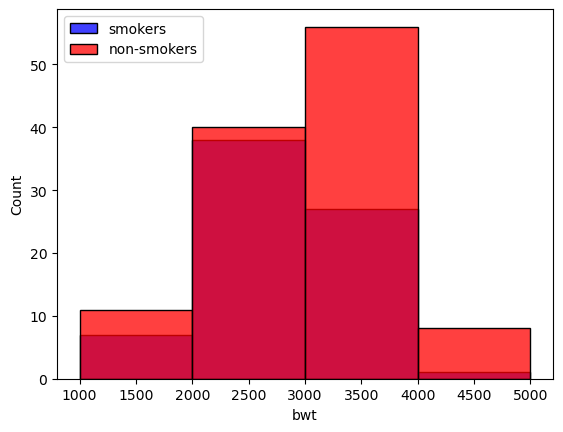

In [20]:
#Ans:
smokers_df = birthwt[birthwt["smoke"] == 1]
non_smokers_df = birthwt[birthwt["smoke"] == 0]

sns.histplot(smokers_df, bins=bins, x="bwt", color="blue", label='smokers')
sns.histplot(non_smokers_df, bins=bins, x="bwt", color="red", label='non-smokers')
plt.legend()
plt.show()

<u>You can get a normalized distribution plot by using `sns.displot`. Run the cell below and compare it to the histogram you've just created.</u>

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



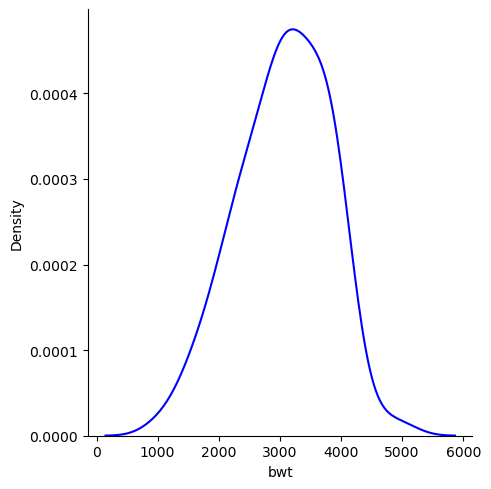

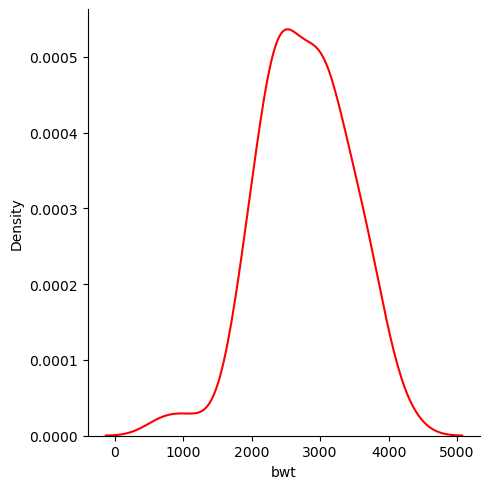

In [21]:
# Try removing the argument hist=False to both distplot and see the difference

sns.displot(birthwt.bwt[birthwt.smoke==0],  kind="kde", color='b', label='non-smokers')
sns.displot(birthwt.bwt[birthwt.smoke==1], kind="kde", color='r', label='smokers')

plt.show()

### Summarizing data set

#### Percentile and Percentile Rank

<u>How do you interpret percentile, quantile, and percentile rank? Run the following cells. What do the numbers show?</u>

In [22]:
# with scipy.stats
from scipy import stats

stats.scoreatpercentile(birthwt.bwt,25)

2414.0

In [23]:
# with numpy
np.percentile(birthwt.bwt,25)

2414.0

In [24]:
# with pandas
birthwt.bwt.quantile(0.25)

2414.0

**Ans:**




<u>What is the percentile rank of birth weight 2500 grams? How do you interprete this number?</u>

In [25]:
# Complete this
stats.percentileofscore(birthwt.bwt, 2500)

31.216931216931215

**Ans:** 31.2169% of the bwt data falls below the value 2500




#### Measure of Central Tendency

<u>Using `.groupby()` and `.agg()`, display the mean and median from :</u>
* each weight interval
* each race group
* smokers/ non-smokers

In [26]:
#Ans:
print(birthwt.groupby("wtint").agg({"bwt": ["mean", "median"]}))
print(birthwt.groupby("race").agg({"bwt": ["mean", "median"]}))
print(birthwt.groupby("smoke").agg({"bwt": ["mean", "median"]}))

               bwt        
              mean  median
wtint                     
0       709.000000   709.0
1      1696.722222  1804.0
2      2546.910256  2495.0
3      3470.891566  3459.0
4      4281.555556  4167.0
              bwt        
             mean  median
race                     
1     3102.718750  3062.0
2     2719.692308  2849.0
3     2805.283582  2835.0
               bwt        
              mean  median
smoke                     
0      3055.695652  3100.0
1      2771.918919  2775.5


#### Box plots

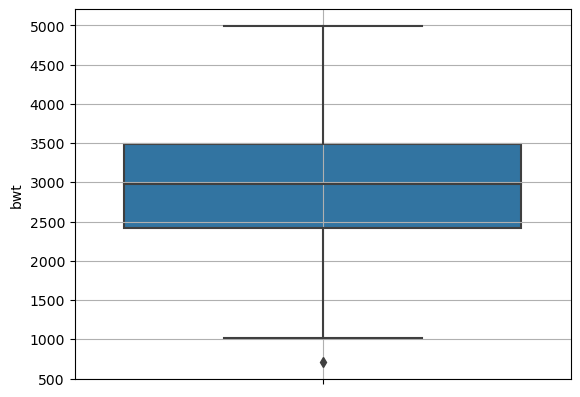

In [27]:
# run this cell
sns.boxplot(y='bwt', data=birthwt)
plt.yticks(range(500,5001,500))
plt.grid(True)
plt.show()

##### Inter-quartile range

<u>From the boxplot, estimate:</u>
* Min and max weights?
Ans: max = 5000, min = 600
* First quartile, Q1?
Ans: Q1 = 2450
* Third quartile, Q3?
Ans: Q3 = 3500
* Inter-quartile range, IQR?
Ans: 1000

Compare your answers to the numbers obtained by using `pandas`/ `numpy`/ `stats`.

In [28]:
#Ans:
print(birthwt["bwt"].max(), birthwt["bwt"].min())
print(birthwt)

4990 709
    low  age  lwt  race  smoke  ptl  ht  ui  ftv   bwt  wtint
85    0   19  182     2      0    0   0   1    0  2523      2
86    0   33  155     3      0    0   0   0    3  2551      2
87    0   20  105     1      1    0   0   0    1  2557      2
88    0   21  108     1      1    0   0   1    2  2594      2
89    0   18  107     1      1    0   0   1    0  2600      2
..  ...  ...  ...   ...    ...  ...  ..  ..  ...   ...    ...
79    1   28   95     1      1    0   0   0    2  2466      2
81    1   14  100     3      0    0   0   0    2  2495      2
82    1   23   94     3      1    0   0   0    0  2495      2
83    1   17  142     2      0    0   1   0    0  2495      2
84    1   21  130     1      1    0   1   0    3  2495      2

[189 rows x 11 columns]


In [29]:
# programmatically
print('min:', birthwt["bwt"].min(),'max:', birthwt["bwt"].max())

Q1 = birthwt["bwt"].quantile(0.25)
print(Q1)

Q3 = birthwt["bwt"].quantile(0.75)
print(Q3)

IQR = stats.iqr(birthwt["bwt"])
print(IQR)

min: 709 max: 4990
2414.0
3487.0
1073.0


##### Outliers identification

<u>Define RUB (reasonable upper boundary) to be RUB=Q3+1.5\*IQR and RLB to be RLB=Q1-1.5\*IQR.<br>
Find the outliers, which fall either below the RLB or above the RUB.</u>

**Ans:**

In [30]:
RUB = Q3 + 1.5*IQR
RLB = Q1 - 1.5*IQR

birthwt.bwt[(birthwt.bwt > RUB) & (birthwt.bwt < RLB)]

Series([], Name: bwt, dtype: int64)

#### Measure of variation

##### Range

<u>The range of a set of data is the difference between the highest and lowest values in the set.
<br>
Display the range of the birth weights for:</u>
* the whole set
* grouped by smokers/ non-smokers

**Ans:**

In [31]:
# range of birthweight of the whole set
print('range = ', birthwt["bwt"].max() - birthwt["bwt"].min(), 'grams')

range =  4281 grams


In [32]:
# range of birthweight, grouped
print('grouped range:')
birthwt.groupby("wtint").agg({"bwt": lambda col: col.max() - col.min()})

grouped range:


,bwt
wtint,
0,0
1,949
2,922
3,992
4,936


##### Deviation score

<u>The deviation score is the difference between given score and the mean, $$x_{i}=\left(X_{i}-\bar{X}\right)$$</u>

<u>Add a new column, `devscore`, that contains the deviation scores of birth weights, to `birthwt` DataFrame.</u>

**Ans:**

In [33]:
birthwt["devscore"] = birthwt["bwt"] - birthwt["bwt"].mean()
birthwt.head(3)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,wtint,devscore
85,0,19,182,2,0,0,0,1,0,2523,2,-421.587302
86,0,33,155,3,0,0,0,0,3,2551,2,-393.587302
87,0,20,105,1,1,0,0,0,1,2557,2,-387.587302


##### Mean absolute deviation

The average of the absolute values of the deviation scores, $$\text{MAD}=\frac{\sum\left|X_{i}-\bar{X}\right|}{n}=\frac{\sum x_{i}}{n}$$

***
Display the mean deviation by either:
* `.abs()` followed by `mean()` on `devscore`
* `.mad()` on birthwt.bwt

**Ans:**

In [34]:
print('Mean deviation =', birthwt["devscore"].abs().mean())
print("Std deviation =", birthwt["bwt"].std())

Mean deviation = 591.0311581422695
Std deviation = 729.2142952167977


##### Variance and standard deviation

<u>Display the variance and standard deviation of the birth weights per weight interval `wtint`.</u>

In [35]:
#Ans:
birthwt.groupby("wtint").agg({"bwt": ["var", "std"]})

bwt            
                var         std
wtint                          
0               NaN         NaN
1      83036.800654  288.161067
2      77972.576257  279.235700
3      89501.390538  299.167830
4      96832.277778  311.178852

#### Measure of Symmetry

##### Skewness

<u>Skewness is a measure of (the lack of) symmetry. You can use `.skew()` on pandas series.</u>
* less than -1 or greater than +1: highly skewed.
* between -1 and -0.5 or between +0.5 and +1: moderately skewed.
* between -0.5 and 0.5: approximately symmetric.
<br>
<br>
<u>Display the skewness of the whole birthweights. What can you conclude?</u>

In [36]:
#Ans:
birthwt["bwt"].skew()

-0.20863702335894543

**Ans:**

##### Kurtosis

<u>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.</u>
* excess kurtosis of a normal distribution: exactly 0
* excess kurtosis<0 : platykurtic (shorter and thinner tails, central peak is lower and broader)
* excess kurtosis>0 : leptokurtic (longer and fatter tails, central peak is higher and sharper)
<br><br>
<u>Using `.kurt()`, display the (excess) kurtosis of the whole birthweights. What can you conclude?</u>

In [37]:
#Ans:
birthwt["bwt"].kurt()

-0.08383885416863368

**Ans:**

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



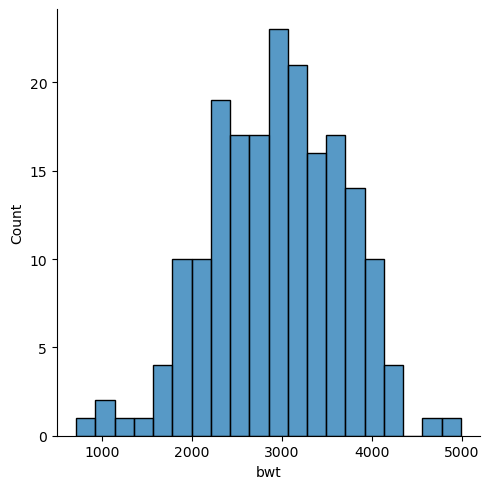

In [38]:
# Run this cell
sns.displot(birthwt.bwt, bins=20)
plt.show()

#### Standard scores

<u>A dataset is normal if its scores are clustered around its median (less data as you go farther from the median).<br>
Empirical rules: if the dataset is normal then</u>
* 68% of data lies within $\mu\pm s$
* 95% of data lies within $\mu\pm 2s$
* 99.7% of data lies within $\mu\pm 3s$
<br>
<u>When a dataset is normally distributed, we can find out the probability of a score occurring by standardising the scores.</u>

<u>Using `stats.percentileofscore()`, `.mean()`, and `.std`, check how many percents of the birth weights fall within $\mu\pm s$, $\mu\pm 2s$, and $\mu\pm 3s$. Close enough to approximate to normal distribution?</u>

**Ans:**

In [42]:
mu = birthwt["bwt"].mean()
s = birthwt["bwt"].std()

#check +/-s
stats.percentileofscore(birthwt["bwt"], mu + s) - stats.percentileofscore(birthwt["bwt"], mu - s)

67.72486772486772

In [43]:
#check +/-2s
stats.percentileofscore(birthwt["bwt"], mu + 2*s) - stats.percentileofscore(birthwt["bwt"], mu - 2*s)

96.29629629629629

In [44]:
#check +/-3s
stats.percentileofscore(birthwt["bwt"], mu + 3*s) - stats.percentileofscore(birthwt["bwt"], mu - 3*s)

99.47089947089947

##### Z-scores

<u>The Z-score, or standard score, is the number of standard deviations a given data point lies above or below mean, $$z=\frac{X-\bar{X}}{s},$$ where $s$ is the standard deviation.</u>

<u>Add a new column, `zscore`, to `birthwt` DataFrame.</u>
<br><br>
Hint: either use the formula and the familiar `.mean()` and `.std()` or find out how to use `stats.zscore()`.
<br><br>
Note that the default degree of freedom (d.o.f) for `stats.zscore` is $n$, while the standard deviation in `.std()` is based on d.o.f of $n-1$, so the numbers will be slightly different unless we set the d.o.f correction, ddof, to 1 (`ddof=1`).

In [57]:
birthwt["zscore"] = (birthwt["bwt"] - mu)/s

# Display a few entries
birthwt[["bwt", "zscore"]].sort_values("zscore")

,bwt,zscore
4,709,-3.065748
10,1021,-2.637890
11,1135,-2.481558
13,1330,-2.214147
15,1474,-2.016674
...,...,...
222,4167,1.676342
223,4174,1.685942
224,4238,1.773707
225,4593,2.260533


#### Transformed standard scores

Say we want to transform our standardized score $z$ into a distribution with a new mean $\bar{X}^{\prime}$ and standard deviation $s^{\prime}$, the transformed score is given by $$X^{\prime}=\left(s^{\prime}\right)\left(z\right)+\bar{X}^{\prime}$$

<u>Add a new column `trfwt` to contain the transformed data with new mean of 3000 grams and standard deviation of 500 grams. Check the new mean, median, and standard deviation.</u>

**Ans:**

In [59]:
birthwt["trfwt"] = birthwt["zscore"]*500+3000

# display mean, median, std
print(birthwt["trfwt"].mean())
print(birthwt["trfwt"].median())
print(birthwt["trfwt"].mode())

3000.0
3022.224398661207
0    3080.506306
Name: trfwt, dtype: float64


### Bivariate Analysis

<u>Find the Pearson's r and Spearman's rho correlation coefficients between `age` and `bwt`</u>

In [63]:
# Pearson's r
print("Pearson")
print(birthwt[["age", "bwt"]].corr())

print("")

# Spearman's rho
print("Spearman")
print(birthwt[["age", "bwt"]].corr(method="spearman"))

Pearson
          age       bwt
age  1.000000  0.090318
bwt  0.090318  1.000000

Spearman
          age       bwt
age  1.000000  0.061234
bwt  0.061234  1.000000


<u>What can you conclude?</u>